In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import sys
import os

from IPython import display
from time import time
from collections import Counter
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style('white') 

import warnings
warnings.filterwarnings('ignore')

print(os.getcwd())
inputPath = 'C:\\Users\\idstwy\\Desktop\\SSHSPH\\SPH6004 Advanced Statistical Learning\\Assignment\\Group\\Data'

C:\Users\idstwy\Desktop\SSHSPH\SPH6004 Advanced Statistical Learning\Assignment\Group\Codes


# read data files

In [2]:
#==============
#read data files
#==============
d1 = pd.read_csv(inputPath + "\\d_master_aggregrated.csv", index_col=None)
print(d1.shape)
print(list(d1.columns))
d1.head(3)

(21293, 161)
['stay_id', 'AKI', 'icu_intime', 'adm_age', 'charlson_comorbidity_index', 'age_score', 'weight', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'cerebrovascular_disease', 'dementia', 'chronic_pulmonary_disease', 'rheumatic_disease', 'peptic_ulcer_disease', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'paraplegia', 'renal_disease', 'malignant_cancer', 'severe_liver_disease', 'metastatic_solid_tumor', 'aids', 'Procedure_Ventilation', 'Procedure_Intubation_Extubation', 'po2_min', 'po2_max', 'po2_median', 'po2_mean', 'po2_std', 'so2_min', 'so2_max', 'so2_median', 'so2_mean', 'so2_std', 'pco2_min', 'pco2_max', 'pco2_median', 'pco2_mean', 'pco2_std', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_median', 'fio2_chartevents_mean', 'fio2_chartevents_std', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_max', 'pao2fio2ratio_media

,stay_id,AKI,icu_intime,adm_age,charlson_comorbidity_index,age_score,weight,myocardial_infarct,congestive_heart_failure,peripheral_vascular_disease,cerebrovascular_disease,dementia,chronic_pulmonary_disease,rheumatic_disease,peptic_ulcer_disease,mild_liver_disease,diabetes_without_cc,diabetes_with_cc,paraplegia,renal_disease,malignant_cancer,severe_liver_disease,metastatic_solid_tumor,aids,Procedure_Ventilation,Procedure_Intubation_Extubation,po2_min,po2_max,po2_median,po2_mean,po2_std,so2_min,so2_max,so2_median,so2_mean,so2_std,pco2_min,pco2_max,pco2_median,pco2_mean,pco2_std,fio2_chartevents_min,fio2_chartevents_max,fio2_chartevents_median,fio2_chartevents_mean,fio2_chartevents_std,aado2_calc_min,aado2_calc_max,aado2_calc_median,aado2_calc_mean,aado2_calc_std,pao2fio2ratio_min,pao2fio2ratio_max,pao2fio2ratio_median,pao2fio2ratio_mean,pao2fio2ratio_std,ph_min,ph_max,ph_median,ph_mean,ph_std,baseexcess_min,baseexcess_max,baseexcess_median,baseexcess_mean,baseexcess_std,totalco2_min,totalco2_max,totalco2_median,totalco2_mean,totalco2_std,hematocrit_min,hematocrit_max,hematocrit_median,hematocrit_mean,hematocrit_std,hemoglobin_min,hemoglobin_max,hemoglobin_median,hemoglobin_mean,hemoglobin_std,chloride_min,chloride_max,chloride_median,chloride_mean,chloride_std,calcium_min,calcium_max,calcium_median,calcium_mean,calcium_std,potassium_min,potassium_max,potassium_median,potassium_mean,potassium_std,sodium_min,sodium_max,sodium_median,sodium_mean,sodium_std,lactate_min,lactate_max,lactate_median,lactate_mean,lactate_std,glucose_min,glucose_max,glucose_median,glucose_mean,glucose_std,heart_rate_avg_min,heart_rate_avg_max,heart_rate_avg_median,heart_rate_avg_mean,heart_rate_avg_std,sbp_avg_min,sbp_avg_max,sbp_avg_median,sbp_avg_mean,sbp_avg_std,dbp_avg_min,dbp_avg_max,dbp_avg_median,dbp_avg_mean,dbp_avg_std,sbp_ni_avg_min,sbp_ni_avg_max,sbp_ni_avg_median,sbp_ni_avg_mean,sbp_ni_avg_std,dbp_ni_avg_min,dbp_ni_avg_max,dbp_ni_avg_median,dbp_ni_avg_mean,dbp_ni_avg_std,mbp_ni_avg_min,mbp_ni_avg_max,mbp_ni_avg_median,mbp_ni_avg_mean,mbp_ni_avg_std,tmp_avg_min,tmp_avg_max,tmp_avg_median,tmp_avg_mean,tmp_avg_std,spo2_avg_min,spo2_avg_max,spo2_avg_median,spo2_avg_mean,spo2_avg_std,glucose_avg_min,glucose_avg_max,glucose_avg_median,glucose_avg_mean,glucose_avg_std,Med_Aminoglycosides,Med_Angiotensin,Med_Diuretics,Med_NSAID,Med_Vancomycin
0,30001535,1,2177-11-17 20:30:00,69.0,6.0,3.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,132.0,132.0,132.000000,0.00000,86.5,86.5,86.5,86.500000,0.000000,28.0,28.00,28.0,28.000000,0.000000,40.0,40.0,40.0,40.000000,0.000000,118.20,118.200,118.200,118.200000,0.000000,330.00,330.000000,330.00,330.000000,0.000000,7.3800,7.380,7.380,7.380000,0.000000,-6.0,-6.0,-6.0,-6.0,0.000000,17.0,17.0,17.0,17.000000,0.000000,31.500000,31.50,31.5,31.500000,0.000000,10.520000,10.520,10.52,10.52000,0.000000,107.400000,107.4,107.4,107.400000,0.000000,1.080,1.080,1.080000,1.080000,0.000000,4.20,4.20,4.200000,4.200000,0.000000,135.2,135.2,135.2,135.200000,0.000000,3.00,3.00,3.000,3.000000,0.000000,192.1,192.1,192.1,192.100000,0.000000,108.5,108.500000,108.5,108.50000,0.000000,102.5,102.5,102.50,102.500000,0.000000,77.0,77.0,77.00,77.000000,0.000000,102.5,102.5,102.50,102.500000,0.000000,77.00,77.0,77.00,77.000000,0.000000,83.00,83.0,83.0,83.000000,0.000000,36.833333,36.833333,36.833333,36.833333,0.000000,99.5,99.5,99.5,99.500000,0.000000,140.0,140.0,140.0,140.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,30002052,1,2180-12-30 05:24:46,63.0,9.0,3.0,56.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,75.1,188.4,127.6,119.094286,41.94232,72.2,97.0,91.6,87.147619,9.137060,35.8,51.52,38.9,43.031429,7.087001,34.0,62.0,57.0,51.857143,11.810004,81.33,280.560,157.450,158.547000,73.028457,207.20,411.428571,319.90,313.032313,75.484822,7.3464,7.368,7.364,7.361057,0.008852,-3.6,2.4,-2.3,-0.8,2.786276,21.4,30.0,23.1,25.497143,4.027579,22.666667,36.80,28.5,28.759524,4.330104,7.566667,12

In [3]:
#=====================================
#Count of ID and nbr of episode_IDs
#=====================================
#Nbr of unique subjects 
list_Subjects = list(d1['stay_id'].unique())
NbrSubjects = len(list_Subjects)
print("Number of subject", NbrSubjects)

#=====================================
#Count of ID and wit AKI 
#=====================================
AKI_LIST = list(set(list(d1[d1["AKI"] == 1]["stay_id"])))
NbrOfAKI = len(AKI_LIST)
print('Number of ID with AKI: 10415 (50.0%) of 20,809 : ', NbrOfAKI)
#[32243713,32571401,38731786,39780363,39321613,31424527,39976979,30736406,36241435,34308124]

Number of subject 20809
Number of ID with AKI: 10415 (50.0%) of 20,809 :  10415


# Missing variables

In [4]:
#get value count & PCT for dataframe
def DFmissingVales(dfX):
    df = pd.DataFrame(dfX.isnull().sum(axis = 0))
    df.columns=["Count"]
    NbrRecs = len(dfX)
    df["Pct"] = np.where(df.count !=0, round((df["Count"]/NbrRecs)*100,3), 0)
    print("Total Number of Records       : ", NbrRecs)
    return df 
    
df_miss = DFmissingVales(d1)
df_miss

Total Number of Records       :  21293


,Count,Pct
stay_id,0,0.0
AKI,0,0.0
icu_intime,0,0.0
adm_age,0,0.0
charlson_comorbidity_index,0,0.0
age_score,0,0.0
weight,0,0.0
myocardial_infarct,0,0.0
congestive_heart_failure,0,0.0
peripheral_vascular_disease,0,0.0


In [5]:
d2 = d1.drop(columns=['icu_intime','age_score'])

# Feature selection 

# manual filter

In [6]:
medCols = [i for i in d2.columns if i.startswith("Med_")]
selectedFis = ["stay_id","AKI",'adm_age','myocardial_infarct','congestive_heart_failure','peripheral_vascular_disease','mild_liver_disease', 
               'diabetes_without_cc','diabetes_with_cc','renal_disease','severe_liver_disease','charlson_comorbidity_index',
              'Procedure_Ventilation', 'Procedure_Intubation_Extubation']
selectChart = ['fio2_chartevents','aado2_calc','pao2fio2ratio','so2','bicarbonate','hematocrit','hemoglobin','chloride','calcium','temperature','potassium',
               'glucose','heart_rate_avg','sbp_avg','dbp_avg','sbp_ni_avg','dbp_ni_avg','mbp_ni_avg','tmp_avg',
               'spo2_avg','glucose_avg','ph']
selectChart1=[]
for ii in selectChart:
    l1 = [i for i in d2.columns if i.startswith(ii)]
    selectChart1.append(l1)
from itertools import chain    
selectChart1 = list(chain.from_iterable(selectChart1))

SELECTED = selectedFis+ selectChart1 +medCols
print("Nbr of Features:", len(SELECTED))

Nbr of Features: 124


## Genetic Selection 
- take 2-3 hours to run

In [7]:
from genetic_selection import GeneticSelectionCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

#mcc = make_scorer(matthews_corrcoef)
estimator = LogisticRegression(solver = "liblinear", C = 6, tol = 1, fit_intercept = True)

from sklearn.model_selection import *
report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
#rkf = RepeatedStratifiedKFold(n_repeats = 2, n_splits = 5)
skf = StratifiedKFold(n_splits = 5)

d2 = d2[[i for i in d2.columns if i in SELECTED]]
Cols1 = [i for i in d2.columns if i not in ['stay_id',"AKI"]]
XX = d2[Cols1]
yy = d2["AKI"]
print(XX.shape, yy.shape)

for i in range(2,117):
  
    selector = GeneticSelectionCV(estimator,
                                cv = skf,
                                verbose = 0,
                                scoring = "accuracy",
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 10,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.05,
                                #tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)

    selector = selector.fit(XX, yy)
    genfeats = XX.columns[selector.support_]
    genfeats = list(genfeats)
    cv_score = selector.generation_scores_[-1]
    
    print("Chosen Feats:  ", round(cv_score,3), genfeats, )
    
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
    
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore

(21293, 117) (21293,)
Chosen Feats:   0.65 ['hematocrit_min', 'hematocrit_max']
Chosen Feats:   0.669 ['fio2_chartevents_min', 'hematocrit_min', 'hematocrit_max']
Chosen Feats:   0.663 ['hematocrit_max', 'hemoglobin_min', 'potassium_min', 'dbp_avg_median']
Chosen Feats:   0.669 ['so2_min', 'fio2_chartevents_min', 'hematocrit_min', 'hemoglobin_max', 'spo2_avg_max']
Chosen Feats:   0.673 ['adm_age', 'fio2_chartevents_min', 'heart_rate_avg_min', 'heart_rate_avg_max', 'dbp_avg_max']
Chosen Feats:   0.669 ['so2_min', 'fio2_chartevents_min', 'heart_rate_avg_median', 'dbp_avg_min', 'dbp_avg_max', 'Med_NSAID']
Chosen Feats:   0.675 ['fio2_chartevents_min', 'ph_std', 'hematocrit_min', 'hematocrit_max', 'potassium_median', 'mbp_ni_avg_min', 'mbp_ni_avg_max', 'glucose_avg_min']
Chosen Feats:   0.725 ['so2_min', 'so2_max', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_mean', 'fio2_chartevents_std', 'dbp_avg_max', 'glucose_avg_max', 'Med_Vancomycin']
Chosen Feats:   0.71 ['charl

Chosen Feats:   0.727 ['charlson_comorbidity_index', 'congestive_heart_failure', 'diabetes_without_cc', 'diabetes_with_cc', 'so2_max', 'so2_mean', 'so2_std', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_mean', 'fio2_chartevents_std', 'aado2_calc_median', 'aado2_calc_std', 'pao2fio2ratio_mean', 'hemoglobin_min', 'potassium_std', 'glucose_mean', 'heart_rate_avg_mean', 'dbp_ni_avg_min', 'dbp_ni_avg_max', 'dbp_ni_avg_std', 'mbp_ni_avg_max', 'tmp_avg_min', 'spo2_avg_median', 'spo2_avg_mean', 'glucose_avg_max']
Chosen Feats:   0.724 ['adm_age', 'diabetes_with_cc', 'fio2_chartevents_min', 'fio2_chartevents_std', 'aado2_calc_max', 'ph_max', 'ph_mean', 'hematocrit_min', 'hematocrit_median', 'chloride_min', 'chloride_max', 'chloride_median', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_std', 'sbp_avg_min', 'sbp_avg_max', 'sbp_avg_std', 'dbp_avg_mean', 'sbp_ni_avg_min', 'sbp_ni_avg_max', 'dbp_ni_avg_mean', 'mbp_ni_avg_min', 'tmp_avg_mean', 'spo2_avg_min', 'spo2_avg

Chosen Feats:   0.733 ['adm_age', 'so2_max', 'so2_median', 'fio2_chartevents_min', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_median', 'pao2fio2ratio_std', 'ph_max', 'ph_mean', 'ph_std', 'hematocrit_min', 'hematocrit_median', 'hematocrit_mean', 'hemoglobin_median', 'chloride_mean', 'calcium_std', 'potassium_max', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_max', 'heart_rate_avg_mean', 'heart_rate_avg_std', 'dbp_avg_max', 'dbp_avg_std', 'sbp_ni_avg_median', 'dbp_ni_avg_median', 'dbp_ni_avg_mean', 'mbp_ni_avg_median', 'spo2_avg_min', 'spo2_avg_median', 'glucose_avg_mean', 'glucose_avg_std', 'Med_Aminoglycosides', 'Med_Diuretics']
Chosen Feats:   0.73 ['adm_age', 'charlson_comorbidity_index', 'diabetes_without_cc', 'severe_liver_disease', 'Procedure_Intubation_Extubation', 'so2_min', 'so2_max', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_median', 'fio2_chartevents_std

Chosen Feats:   0.733 ['adm_age', 'charlson_comorbidity_index', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'Procedure_Ventilation', 'Procedure_Intubation_Extubation', 'so2_median', 'fio2_chartevents_min', 'fio2_chartevents_max', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_mean', 'ph_max', 'ph_mean', 'hemoglobin_min', 'hemoglobin_mean', 'hemoglobin_std', 'chloride_max', 'calcium_min', 'calcium_max', 'calcium_mean', 'calcium_std', 'potassium_max', 'potassium_median', 'potassium_mean', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_median', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_max', 'heart_rate_avg_std', 'sbp_avg_mean', 'sbp_avg_std', 'dbp_avg_max', 'dbp_avg_mean', 'sbp_ni_avg_std', 'dbp_ni_avg_min', 'dbp_ni_avg_mean', 'mbp_ni_avg_max', 'mbp_ni_avg_median', 'tmp_avg_min', 'tmp_avg_max', 'glucose_avg_max', 'glucose_avg_mean', 'Med_Angiotensin', 'Med_NSAID']
Chosen Feats:   0.732 

Chosen Feats:   0.734 ['adm_age', 'myocardial_infarct', 'peripheral_vascular_disease', 'diabetes_without_cc', 'renal_disease', 'Procedure_Intubation_Extubation', 'so2_min', 'so2_mean', 'so2_std', 'fio2_chartevents_min', 'fio2_chartevents_median', 'fio2_chartevents_mean', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_std', 'pao2fio2ratio_median', 'pao2fio2ratio_mean', 'ph_max', 'hemoglobin_min', 'hemoglobin_std', 'chloride_min', 'chloride_max', 'chloride_mean', 'chloride_std', 'calcium_min', 'calcium_max', 'calcium_median', 'calcium_mean', 'potassium_min', 'potassium_max', 'potassium_mean', 'glucose_min', 'glucose_max', 'glucose_mean', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_max', 'heart_rate_avg_mean', 'heart_rate_avg_std', 'sbp_avg_mean', 'dbp_avg_min', 'dbp_avg_max', 'dbp_avg_mean', 'dbp_avg_std', 'sbp_ni_avg_min', 'sbp_ni_avg_mean', 'sbp_ni_avg_std', 'dbp_ni_avg_median', 'dbp_ni_avg_std', 'mbp_ni_avg_min', 'mbp_ni_avg_std', 'tmp_avg_min', 'tmp_avg_median', 'tmp_avg

Chosen Feats:   0.736 ['adm_age', 'charlson_comorbidity_index', 'myocardial_infarct', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'renal_disease', 'Procedure_Intubation_Extubation', 'so2_mean', 'fio2_chartevents_min', 'fio2_chartevents_median', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_max', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_max', 'ph_median', 'ph_mean', 'hematocrit_min', 'hematocrit_max', 'hematocrit_std', 'hemoglobin_max', 'chloride_min', 'chloride_max', 'chloride_median', 'chloride_mean', 'chloride_std', 'potassium_min', 'potassium_max', 'glucose_min', 'glucose_max', 'glucose_median', 'glucose_std', 'heart_rate_avg_max', 'heart_rate_avg_mean', 'sbp_avg_min', 'sbp_avg_mean', 'sbp_avg_std', 'dbp_avg_min', 'dbp_avg_max', 'dbp_avg_median', 'dbp_avg_std', 'sbp_ni_avg_min', 'sbp_ni_avg_max', 'sbp_ni_avg_std', 'dbp_ni_avg_min', 'dbp_ni_avg_std', 'mbp_ni_avg_max', 'mbp_ni_avg_mean', 'mbp_ni_avg_std', 'tmp_a

Chosen Feats:   0.736 ['congestive_heart_failure', 'peripheral_vascular_disease', 'mild_liver_disease', 'diabetes_without_cc', 'renal_disease', 'Procedure_Intubation_Extubation', 'so2_max', 'so2_median', 'fio2_chartevents_min', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_max', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_max', 'ph_median', 'ph_std', 'hematocrit_min', 'hematocrit_max', 'hematocrit_mean', 'hematocrit_std', 'hemoglobin_min', 'hemoglobin_std', 'chloride_min', 'chloride_max', 'chloride_median', 'chloride_mean', 'chloride_std', 'calcium_max', 'calcium_mean', 'calcium_std', 'potassium_min', 'potassium_median', 'potassium_mean', 'glucose_min', 'glucose_max', 'glucose_median', 'glucose_mean', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_max', 'heart_rate_avg_mean', 'heart_rate_avg_std', 'sbp_avg_std', 'dbp_avg_max', 'dbp_avg_mean', 'dbp_avg_std', 'sbp_ni_avg_min', 'sbp_ni_avg_max', 'sbp_ni_avg_median', 'sbp_ni_avg_mean'

Chosen Feats:   0.738 ['adm_age', 'charlson_comorbidity_index', 'congestive_heart_failure', 'peripheral_vascular_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'renal_disease', 'Procedure_Ventilation', 'Procedure_Intubation_Extubation', 'so2_min', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_mean', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_median', 'pao2fio2ratio_mean', 'ph_min', 'ph_max', 'ph_mean', 'ph_std', 'hematocrit_min', 'hematocrit_max', 'hematocrit_median', 'hematocrit_std', 'hemoglobin_min', 'hemoglobin_median', 'hemoglobin_mean', 'chloride_max', 'chloride_mean', 'chloride_std', 'calcium_max', 'calcium_std', 'potassium_min', 'potassium_mean', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_median', 'glucose_mean', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_std', 'sbp_avg_min', 'sbp_avg_max', 'sbp_avg_std', 'dbp_avg_min', 'dbp_avg_max', 'dbp_avg_std', 'sbp_ni_avg_min

Chosen Feats:   0.735 ['adm_age', 'charlson_comorbidity_index', 'congestive_heart_failure', 'peripheral_vascular_disease', 'diabetes_with_cc', 'renal_disease', 'Procedure_Ventilation', 'so2_min', 'so2_median', 'so2_mean', 'so2_std', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_median', 'fio2_chartevents_mean', 'fio2_chartevents_std', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_median', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_min', 'ph_max', 'ph_median', 'ph_mean', 'ph_std', 'hematocrit_min', 'hematocrit_mean', 'hematocrit_std', 'hemoglobin_min', 'hemoglobin_median', 'hemoglobin_mean', 'hemoglobin_std', 'chloride_max', 'chloride_median', 'chloride_mean', 'chloride_std', 'calcium_min', 'calcium_median', 'calcium_std', 'potassium_min', 'potassium_max', 'potassium_median', 'potassium_mean', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_std', 'heart_rate_avg_min', 'hea

Chosen Feats:   0.734 ['charlson_comorbidity_index', 'congestive_heart_failure', 'mild_liver_disease', 'diabetes_with_cc', 'renal_disease', 'severe_liver_disease', 'Procedure_Intubation_Extubation', 'so2_max', 'so2_median', 'so2_mean', 'fio2_chartevents_min', 'fio2_chartevents_mean', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_max', 'pao2fio2ratio_median', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_min', 'ph_max', 'ph_median', 'ph_mean', 'hematocrit_min', 'hematocrit_max', 'hematocrit_median', 'hematocrit_mean', 'hemoglobin_min', 'hemoglobin_mean', 'hemoglobin_std', 'chloride_min', 'chloride_max', 'chloride_median', 'chloride_std', 'calcium_min', 'calcium_max', 'calcium_median', 'calcium_mean', 'calcium_std', 'potassium_max', 'potassium_mean', 'potassium_std', 'glucose_min', 'glucose_median', 'glucose_mean', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_max', 'heart_rate_avg_median', 'heart_rate_avg_mean', 'hea

Chosen Feats:   0.736 ['adm_age', 'charlson_comorbidity_index', 'myocardial_infarct', 'congestive_heart_failure', 'mild_liver_disease', 'diabetes_without_cc', 'diabetes_with_cc', 'severe_liver_disease', 'Procedure_Intubation_Extubation', 'so2_max', 'so2_median', 'so2_mean', 'so2_std', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_std', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_median', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_mean', 'ph_std', 'hematocrit_min', 'hematocrit_max', 'hematocrit_mean', 'hematocrit_std', 'hemoglobin_min', 'hemoglobin_mean', 'hemoglobin_std', 'chloride_min', 'chloride_max', 'chloride_std', 'calcium_min', 'calcium_max', 'calcium_median', 'calcium_mean', 'calcium_std', 'potassium_min', 'potassium_median', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_median', 'glucose_mean', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_max', 'heart_rate_avg_median', 'heart_rate_avg_mea

Chosen Feats:   0.734 ['adm_age', 'charlson_comorbidity_index', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'mild_liver_disease', 'diabetes_with_cc', 'severe_liver_disease', 'Procedure_Ventilation', 'Procedure_Intubation_Extubation', 'so2_min', 'so2_max', 'so2_median', 'so2_std', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_median', 'fio2_chartevents_mean', 'fio2_chartevents_std', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_max', 'ph_median', 'ph_mean', 'hematocrit_min', 'hematocrit_max', 'hematocrit_median', 'hematocrit_mean', 'hematocrit_std', 'hemoglobin_min', 'hemoglobin_max', 'hemoglobin_median', 'hemoglobin_mean', 'hemoglobin_std', 'chloride_min', 'chloride_max', 'chloride_mean', 'chloride_std', 'calcium_max', 'calcium_median', 'calcium_mean', 'calcium_std', 'potassium_max', 'potassium_median', 'potassium_s

Chosen Feats:   0.735 ['adm_age', 'charlson_comorbidity_index', 'congestive_heart_failure', 'peripheral_vascular_disease', 'mild_liver_disease', 'diabetes_with_cc', 'severe_liver_disease', 'Procedure_Ventilation', 'Procedure_Intubation_Extubation', 'so2_min', 'so2_mean', 'fio2_chartevents_min', 'fio2_chartevents_max', 'fio2_chartevents_median', 'fio2_chartevents_mean', 'fio2_chartevents_std', 'aado2_calc_min', 'aado2_calc_max', 'aado2_calc_median', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_median', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_min', 'ph_median', 'ph_mean', 'ph_std', 'hematocrit_min', 'hematocrit_std', 'hemoglobin_min', 'hemoglobin_max', 'hemoglobin_median', 'hemoglobin_mean', 'hemoglobin_std', 'chloride_min', 'chloride_max', 'chloride_std', 'calcium_min', 'calcium_max', 'calcium_median', 'calcium_mean', 'calcium_std', 'potassium_min', 'potassium_max', 'potassium_median', 'potassium_mean', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_median', 'gl

In [8]:
#Chosen Feats:   0.747
geneticCVSelection = ['adm_age', 'charlson_comorbidity_index', 'myocardial_infarct', 'congestive_heart_failure', 'peripheral_vascular_disease', 'mild_liver_disease', 'diabetes_without_cc', 'renal_disease', 'severe_liver_disease', 'Procedure_Ventilation', 'so2_max', 'so2_mean', 'so2_std', 'fio2_chartevents_min', 'fio2_chartevents_mean', 'aado2_calc_min', 'aado2_calc_median', 'aado2_calc_mean', 'aado2_calc_std', 'pao2fio2ratio_min', 'pao2fio2ratio_median', 'pao2fio2ratio_mean', 'pao2fio2ratio_std', 'ph_min', 'ph_median', 'ph_mean', 'ph_std', 'hematocrit_min', 'hematocrit_median', 'hemoglobin_min', 'hemoglobin_max', 'hemoglobin_median', 'hemoglobin_std', 'chloride_min', 'chloride_max', 'chloride_median', 'chloride_mean', 'calcium_min', 'calcium_max', 'potassium_min', 'potassium_max', 'potassium_std', 'glucose_min', 'glucose_max', 'glucose_std', 'heart_rate_avg_min', 'heart_rate_avg_mean', 'heart_rate_avg_std', 'sbp_avg_min', 'sbp_avg_max', 'sbp_avg_median', 'sbp_avg_std', 'dbp_avg_max', 'dbp_avg_median', 'dbp_avg_mean', 'dbp_avg_std', 'sbp_ni_avg_min', 'sbp_ni_avg_max', 'sbp_ni_avg_std', 'dbp_ni_avg_mean', 'mbp_ni_avg_min', 'mbp_ni_avg_max', 'mbp_ni_avg_median', 'mbp_ni_avg_mean', 'mbp_ni_avg_std', 'tmp_avg_min', 'tmp_avg_max', 'tmp_avg_median', 'tmp_avg_mean', 'tmp_avg_std', 'spo2_avg_min', 'spo2_avg_median', 'spo2_avg_mean', 'glucose_avg_min', 'glucose_avg_max', 'glucose_avg_mean', 'glucose_avg_std', 'Med_Angiotensin', 'Med_Diuretics', 'Med_Vancomycin']
len(geneticCVSelection)

80

## Train test split

In [9]:
#=================
## Train test split
#=================
#Create a list of unique IDs
listIDs = d2['stay_id'].unique().tolist()
print('Total nbrs of IDs :', len(listIDs))

#Select 4162 stay_ids (~20%) to be test set.
rng = np.random.default_rng(123)
nbr = round(20809*0.2,0)
listIDs_test = rng.choice(listIDs, size=4162).tolist()
print('Nbr of test IDs (20%) :', len(listIDs_test))

listIDs_train = list(set(listIDs)-set(listIDs_test))
print('Nbr of train IDs (80%):', len(listIDs_train))

Total nbrs of IDs : 20809
Nbr of test IDs (20%) : 4162
Nbr of train IDs (80%): 17058


In [10]:
train = d2[d2['stay_id'].isin(listIDs_train)]
test = d2[d2['stay_id'].isin(listIDs_test)]

X_train = train[geneticCVSelection]
X_test = test[geneticCVSelection]
y_train = train[["AKI"]]
y_test = test[["AKI"]]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17433, 80) (3860, 80)
(17433, 1) (3860, 1)


In [11]:
X =  d2[geneticCVSelection] #drop(columns= ['stay_id', 'AKI'] 
y = d2[["AKI"]]
print(X.shape, y.shape)

(21293, 80) (21293, 1)


# Modelling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold ,RepeatedKFold, RepeatedStratifiedKFold,StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import sklearn.metrics
from numpy import mean
from numpy import std
import math

def plotROCcurve (modelX, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    y_train1 = y_train
    y_test1 = y_test

    #ROC curve for train
    y_pred = modelX.predict(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train1, y_pred)
    auc_traindata = auc(fpr_train, tpr_train)

    #ROC curve for test
    y_pred2 = modelX.predict(X_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test1, y_pred2)
    auc_testdata = auc(fpr_test, tpr_test)

    #Plot ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot([0, 1], [0, 1], 'k--', color='grey')
    plt.plot(fpr_train, tpr_train, label='Train (area = {:.3f})'.format(auc_traindata), color='orange', linewidth=2.0)
    plt.plot(fpr_test, tpr_test, label='Test (area = {:.3f})'.format(auc_testdata), color='steelblue',linewidth=2.0)
    plt.xlabel('1 - Specificiity (FPR)', fontsize='large')
    plt.ylabel('Sensitivity (TFR)', fontsize='large')
    plt.title('ROC curve for Gradient boosting', fontsize='large')
    plt.legend(loc=4, fontsize='large')
    #plt.savefig("ROC.png", bbox_inches='tight', format='png', dpi=300)
    plt.show()

In [13]:
#==============
## define scaler
#==============
# fit scaler on the training dataset
scaler = MinMaxScaler()
scaler.fit(X_train)

# scale the data
X_train1 = scaler.transform(X_train)
X_test1 = scaler.transform(X_test)

# fit scaler on the training dataset
X_train1 = pd.DataFrame(X_train1, columns=X_train.columns)
X_test1 = pd.DataFrame(X_test1, columns=X_test.columns)
print(X_train.shape)

(17433, 80)


In [14]:
#==============
#AdaBoost Classifier
#==============
from sklearn.ensemble import AdaBoostClassifier
ModelLabel = "AdaBoostClassifier"

# define paramters 
model_ADA = AdaBoostClassifier(random_state=123) #n_estimators=1000,
model_ADA.fit(X_train1, y_train)

#Training data performance
pred = model_ADA.predict(X_train1)
true = y_train

print('Model    : ', ModelLabel)
print('Accuracy : %.3f ' % accuracy_score(true, pred))
print('ROC_AUC  : %.3f  ' %  roc_auc_score(true, pred))

# Test data performance
pred = model_ADA.predict(X_test1)
true = y_test

print("")
print('Accuracy test data : %.3f ' % accuracy_score(true, pred))
print('ROC_AUC  test data : %.3f  ' %  roc_auc_score(true, pred))

# Model    :  AdaBoostClassifier
# Accuracy : 0.747 
# ROC_AUC  : 0.746  

# Accuracy test data : 0.740 
# ROC_AUC  test data : 0.739

Model    :  AdaBoostClassifier
Accuracy : 0.747 
ROC_AUC  : 0.746  

Accuracy test data : 0.740 
ROC_AUC  test data : 0.739  


In [17]:
#==============
#XGBClassifier
#==============
#!pip install xgboost
from xgboost import XGBClassifier
ModelLabel = "XGBClassifier"

# define paramters 
model_XGB = XGBClassifier(random_state=123) #RandomForestClassifier(random_state=123) #n_estimators=1000,
model_XGB.fit(X_train1, y_train)

#Training data performance
pred = model_XGB.predict(X_train1)
true = y_train

print('Model    : ', ModelLabel)
print('Accuracy : %.3f ' % accuracy_score(true, pred))
print('ROC_AUC  : %.3f  ' %  roc_auc_score(true, pred))

# Test data performance
pred = model_XGB.predict(X_test1)
true = y_test

print("")
print('Accuracy test data : %.3f ' % accuracy_score(true, pred))
print('ROC_AUC  test data : %.3f  ' %  roc_auc_score(true, pred))

# Model    :  XGBClassifier
# Accuracy : 0.961 
# ROC_AUC  : 0.961  

# Accuracy test data : 0.749 
# ROC_AUC  test data : 0.748

[19:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model    :  XGBClassifier
Accuracy : 0.961 
ROC_AUC  : 0.961  

Accuracy test data : 0.749 
ROC_AUC  test data : 0.748  


In [18]:
#==============
#Gradient Boosting Classifier
#==============
from sklearn.ensemble import GradientBoostingClassifier
ModelLabel = "GradientBoostingClassifier"

# define paramters 
model_GB = GradientBoostingClassifier(random_state=123) #n_estimators=1000,
model_GB.fit(X_train1, y_train)

#Training data performance
pred = model_GB.predict(X_train1)
true = y_train

print('Model    : ', ModelLabel)
print('Accuracy : %.3f ' % accuracy_score(true, pred))
print('ROC_AUC  : %.3f  ' %  roc_auc_score(true, pred))

# Test data performance
pred = model_GB.predict(X_test1)
true = y_test

print("")
print('Accuracy test data : %.3f ' % accuracy_score(true, pred))
print('ROC_AUC  test data : %.3f  ' %  roc_auc_score(true, pred))

# Model    :  GradientBoostingClassifier
# Accuracy : 0.773 
# ROC_AUC  : 0.773  

# Accuracy test data : 0.746 
# ROC_AUC  test data : 0.744 

Model    :  GradientBoostingClassifier
Accuracy : 0.773 
ROC_AUC  : 0.773  

Accuracy test data : 0.746 
ROC_AUC  test data : 0.744  


# Feature Importance

In [19]:
importance = model_XGB.get_booster().get_score(importance_type="gain")
fi_impt = pd.DataFrame.from_dict(importance, orient='index').reset_index()
fi_impt.columns =["fi", "score"]
fi_impt =fi_impt.sort_values(by=["score"], ascending=False)
fi_impt = fi_impt.reset_index(drop=True)
fi_impt1 = fi_impt[fi_impt["score"]>0]
fi_list = list(fi_impt1["fi"])
print(len(fi_list))
print(fi_list)

78
['congestive_heart_failure', 'hemoglobin_std', 'fio2_chartevents_min', 'dbp_avg_max', 'spo2_avg_min', 'charlson_comorbidity_index', 'myocardial_infarct', 'tmp_avg_std', 'renal_disease', 'potassium_min', 'mbp_ni_avg_max', 'fio2_chartevents_mean', 'tmp_avg_min', 'aado2_calc_std', 'ph_std', 'pao2fio2ratio_std', 'tmp_avg_max', 'severe_liver_disease', 'sbp_ni_avg_std', 'sbp_avg_max', 'heart_rate_avg_min', 'heart_rate_avg_std', 'aado2_calc_min', 'so2_std', 'tmp_avg_mean', 'calcium_min', 'potassium_std', 'aado2_calc_mean', 'pao2fio2ratio_min', 'pao2fio2ratio_mean', 'glucose_avg_min', 'chloride_min', 'adm_age', 'sbp_avg_std', 'chloride_max', 'dbp_avg_std', 'glucose_avg_max', 'ph_median', 'spo2_avg_mean', 'ph_mean', 'aado2_calc_median', 'sbp_ni_avg_min', 'calcium_max', 'sbp_avg_min', 'sbp_ni_avg_max', 'glucose_std', 'spo2_avg_median', 'hematocrit_min', 'mbp_ni_avg_std', 'glucose_max', 'mbp_ni_avg_mean', 'pao2fio2ratio_median', 'hemoglobin_min', 'dbp_avg_mean', 'chloride_mean', 'so2_max', 'sb

In [20]:
fi_df10 = fi_impt1.head(15)
fi_df10["fi"].to_clipboard()
fi_df10["fi1"] = ['Congestive Heart Failure',
'Hemoglobin SD',
'Fraction of inspired oxygen (FiO2) Min',
'Diastolic blood pressure average Max',
'Oxygen saturation (sO2) average Min',
'Charlson Comorbidity Index',
'Myocardial Infarct',
'Temperature average SD',
'Renal Disease',
'Potassium Min',
'Mean blood pressure ni average Mean',
'Fraction of inspired oxygen (FiO2) Mean',
'Temperature average Mean',
'Alveolar-to-arterial oxygen difference (AaDO2) calculated SD',
'PH SD']

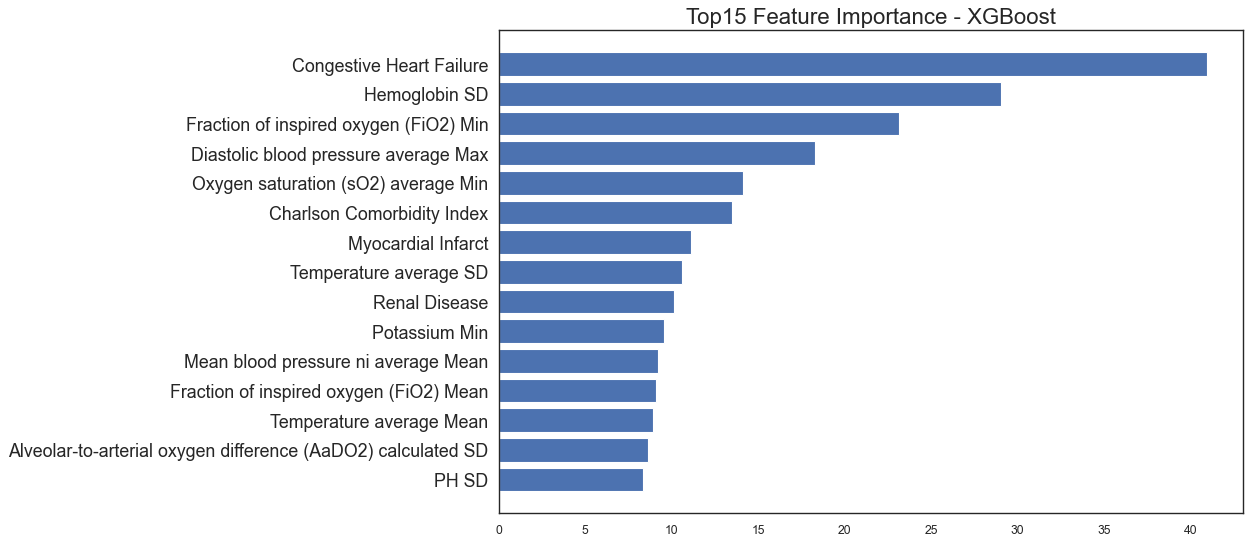

In [21]:
#==================
#feature importance 
#==================
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

def f_importances(coef, names, label):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.title("Top15 Feature Importance - %s" %label, fontsize=20)
#     plt.xtitle("scores", fontsize=20)
    plt.yticks(range(len(names)), names, fontsize=16)
    plt.show()
    
f_importances(fi_df10["score"] , fi_df10["fi1"], "XGBoost")

# plot ROC curve

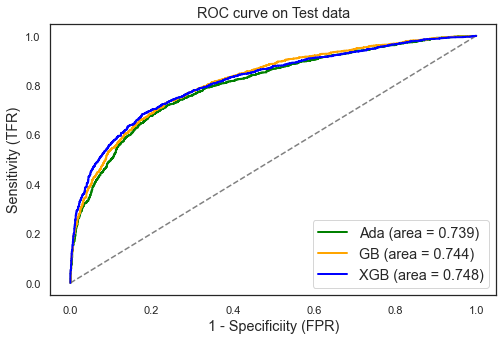

In [33]:
def plotROCcurve1 (y_train, y_test):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc

    #ROC curve for test
    y_predXGB = model_XGB.predict_proba(X_test1)
    y_predXGB1 = np.where(y_predXGB[:,1]>=0.5,1,0)
    fpr_test1, tpr_test1, thresholds_test = roc_curve(y_test, y_predXGB[:,1])
    fpr_test1A, tpr_test1A, thresholds_test = roc_curve(y_test, y_predXGB1)
    auc_testdata1 = auc(fpr_test1A, tpr_test1A)

    y_predADA = model_ADA.predict_proba(X_test1)
    y_predADA1 = np.where(y_predADA[:,1]>=0.5,1,0)
    fpr_test2, tpr_test2, thresholds_test = roc_curve(y_test, y_predADA[:,1])
    fpr_test2A, tpr_test2A, thresholds_test = roc_curve(y_test, y_predADA1)
    auc_testdata2 = auc(fpr_test2A, tpr_test2A)
    
    y_predGB = model_GB.predict_proba(X_test1)
    y_predGB1 = np.where(y_predGB[:,1]>=0.5,1,0)
    fpr_test3, tpr_test3, thresholds_test = roc_curve(y_test, y_predGB[:,1])
    fpr_test3A, tpr_test3A, thresholds_test = roc_curve(y_test, y_predGB1)
    auc_testdata3 = auc(fpr_test3A, tpr_test3A)

    #Plot ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot([0, 1], [0, 1], 'k--', color='grey')
    plt.plot(fpr_test2, tpr_test2, label='Ada (area = {:.3f})'.format(auc_testdata2), color='green', linewidth=2.0)
    plt.plot(fpr_test3, tpr_test3, label='GB (area = {:.3f})'.format(auc_testdata3), color='orange',linewidth=2.0)
    plt.plot(fpr_test1, tpr_test1, label='XGB (area = {:.3f})'.format(auc_testdata1), color='blue', linewidth=2.0)
    plt.xlabel('1 - Specificiity (FPR)', fontsize='large')
    plt.ylabel('Sensitivity (TFR)', fontsize='large')
    plt.title('ROC curve on Test data', fontsize='large')
    plt.legend(loc=4, fontsize='large')
    #plt.savefig("ROC.png", bbox_inches='tight', format='png', dpi=300)
    plt.show()
    
plotROCcurve1 (y_train, y_test)